### NGC 507
1. Import the dataset of all the galaxies with a redshift from NED. 
2. Filter out the photometric redshift (we are only interested in the spectroscopic ones).
3. Import the SDSS dataset from CrossID of NGC 383. 
4. Filter out stars (we are only interested in galaxies).
5. Merge SDSS dataset with redshifts from NED dataset.


Default SQL query from CrossID to combine as many objects from NED dataset with the SDSS library: 
```SQL
SELECT 
   p.objID, p.ra, p.dec, p.run, p.rerun, p.camcol, p.field,
   dbo.fPhotoTypeN(p.type) as type,
   p.modelMag_u, p.modelMag_g, p.modelMag_r, p.modelMag_i, p.modelMag_z 
FROM #upload u
      JOIN #x x ON x.up_id = u.up_id
      JOIN PhotoTag p ON p.objID = x.objID 
ORDER BY x.up_id
```

We use the merged dataset to find the redshift range of galaxies within the NGC 507 cluster.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ngc507_ned = pd.read_csv('../datasets/ned/ngc507.csv')
ngc507_ned = ngc507_ned[ngc507_ned.RedshiftFlag!='PHOT']
ngc507_ned.head()

,ObjectName,RA,DEC,Type,Velocity,Redshift,RedshiftFlag
0,NGC0507,20.91628,33.25606,G,4934,0.016458,NaN
1,MCXCJ0123.6+3315,20.92083,33.26111,GClstr,4917,0.016400,NaN
2,ARP229,20.91792,33.26778,GPair,4929,0.016441,NaN
3,NGC0508,20.91917,33.28028,G,5526,0.018433,NaN
4,RSCG08,20.87521,33.27152,GGroup,5096,0.017000,NaN


In [3]:
ngc507_sdss = pd.read_csv('../datasets/sdss/ngc507.csv')
ngc507_sdss = ngc507_sdss[ngc507_sdss.type!='STAR']
ngc507_sdss.head()

,ObjectName,objID,ra,dec,run,rerun,camcol,field,type,u0,g0,r0,i0,z0
1,SDSSJ012353.87+331427.1,1237678892815680242,20.974469,33.240885,7781,301,2,71,GALAXY,22.90009,21.38842,19.91567,18.65469,17.82987
2,SDSSJ012333.68+331927.2,1237678806920266492,20.890353,33.324232,7761,301,2,131,GALAXY,25.79398,21.17136,19.19569,18.66619,18.10230
3,NGC0503,1237678806920265786,20.868438,33.331831,7761,301,2,131,GALAXY,16.51546,14.72241,13.79656,13.47234,13.20987
4,ARK039,1237678806920331477,20.993833,33.313239,7761,301,2,132,GALAXY,16.40405,14.62142,13.81751,13.43835,13.15265
5,2MASXJ01234321+3321012,1237678806920266099,20.930123,33.350463,7761,301,2,131,GALAXY,20.27046,18.14793,16.80635,16.30974,15.95572


In [4]:
# Final table of ngc507, cross-id table merged with redshifts from NED
ngc507 = pd.merge(ngc507_sdss, ngc507_ned[['ObjectName', 'Redshift', 'RedshiftFlag']], on='ObjectName')
ngc507.head()

,ObjectName,objID,ra,dec,run,rerun,camcol,field,type,u0,g0,r0,i0,z0,Redshift,RedshiftFlag
0,SDSSJ012353.87+331427.1,1237678892815680242,20.974469,33.240885,7781,301,2,71,GALAXY,22.90009,21.38842,19.91567,18.65469,17.82987,-0.000083,SPEC
1,SDSSJ012333.68+331927.2,1237678806920266492,20.890353,33.324232,7761,301,2,131,GALAXY,25.79398,21.17136,19.19569,18.66619,18.10230,0.409821,SPEC
2,NGC0503,1237678806920265786,20.868438,33.331831,7761,301,2,131,GALAXY,16.51546,14.72241,13.79656,13.47234,13.20987,0.019754,NaN
3,ARK039,1237678806920331477,20.993833,33.313239,7761,301,2,132,GALAXY,16.40405,14.62142,13.81751,13.43835,13.15265,0.016752,NaN
4,2MASXJ01234321+3321012,1237678806920266099,20.930123,33.350463,7761,301,2,131,GALAXY,20.27046,18.14793,16.80635,16.30974,15.95572,0.210722,SPEC


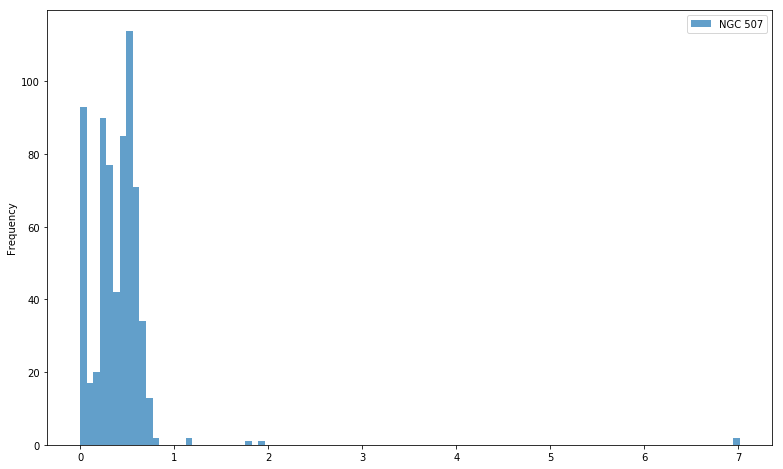

In [5]:
ngc507_hist = pd.DataFrame({ 'NGC 507': ngc507.Redshift }, columns=['NGC 507'])
ngc507_hist.plot.hist(alpha=0.7, figsize=(13,8), bins=100)

Center of NGC 383 has a redshift of 0.01646 +/- 0.00002 .
We want to zoom into the first spike and see if we can get the a clear Gaussian.

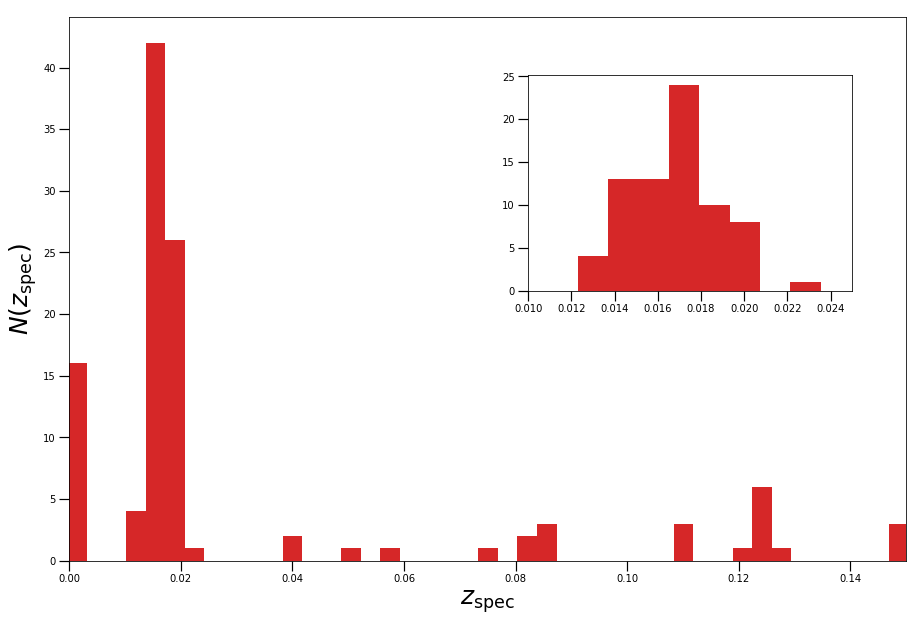

In [6]:
z = ngc507['Redshift']
fig = plt.figure(figsize=(15,10))
plt.hist(z,bins=2000,color='C3')
plt.xlim(0,0.15)
plt.tick_params('both', length=10, width=1.2, which='major') # bigger axis ticks
plt.xlabel('$z_\mathrm{spec}$',fontsize=25)
plt.ylabel('$N(z_\mathrm{spec})$',fontsize=25)

# insert subplot:
a = plt.axes([.55, .5, .3, .3])
plt.hist(z,bins=5000,color='C3')
plt.xlim(0.01,0.025)
plt.tick_params('both', length=10, width=1.2, which='major') # bigger axis ticks

### Conclusion
According to NED the center of NGC 507 has a redshift of 0.01646 +/- 0.00002. We use that value to determine the range of redshifts that belong to the cluster. We can see an apparent Gaussian curve that ranges from 0.012 and 0.022. We conclude that galaxies with redshifts within this range are in the foreground of NGC 507.

In [7]:
# Export merged list
ngc507.to_csv(r'../datasets/complete/ngc507.csv', index=False)